In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image
import pillow_heif


# Load HEIF/HEIC Image in

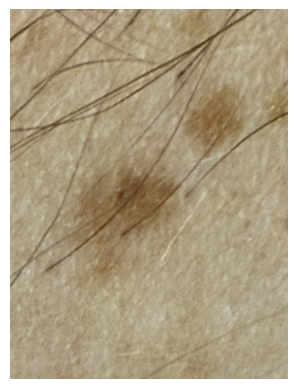

In [2]:
pillow_heif.register_heif_opener()  # Register HEIF/HEIC support

# Open the HEIC image
img = Image.open('../raw_data/input_photos/IMG_1521.HEIC')

# Display it (e.g., in Jupyter)
plt.imshow(img)
plt.axis('off')
plt.show()

# rotate image to make it lanscape

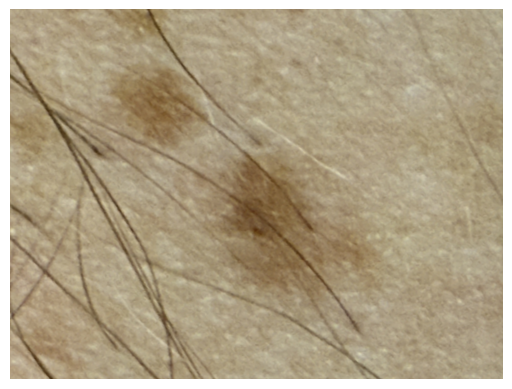

(4032, 3024)


In [13]:
# Rotate 90 degrees counterclockwise
img_rotated = img.rotate(90, expand=True)

# Display
plt.imshow(img_rotated)
plt.axis('off')
plt.show()
print(img_rotated.size)

# Resize the Image to dataset size

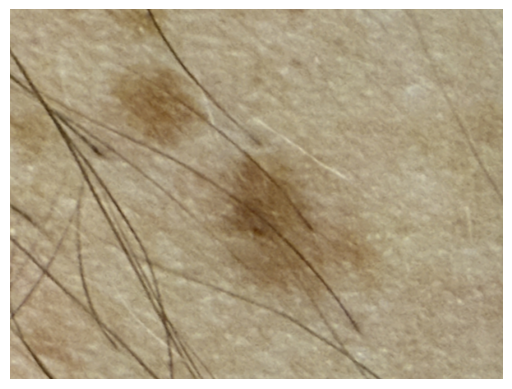

(600, 450)


In [8]:
# Step 3: Resize
img_rotated.thumbnail((600, 450), Image.Resampling.LANCZOS)

# Step 4: Strip metadata (optional)
img_clean = Image.new(img_rotated.mode, img_rotated.size)
img_clean.putdata(list(img_rotated.getdata()))

# Step 5: Show image (still all in memory)
plt.imshow(img_clean)
plt.axis('off')
plt.show()
print(img_clean.size)

# Apply the same preprocesing that the dataset goes through

- this will make it a `np.array`

In [7]:
def process_image(image, width, height):
    img_converted = image.convert("RGB")
    img_converted_resized = img.resize((width, height))
    img_array = np.array(img_converted_resized)
    return img_array

(96, 96, 3)


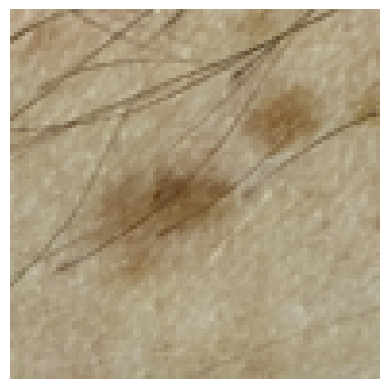

In [17]:
img_array = process_image(img_clean, 96, 96)
plt.axis('off')
plt.imshow(img_array)
print(img_array.shape)

In [18]:
img_array

array([[[183, 164, 134],
        [176, 156, 126],
        [178, 157, 125],
        ...,
        [176, 161, 132],
        [180, 166, 138],
        [181, 166, 137]],

       [[180, 161, 131],
        [177, 156, 125],
        [181, 161, 132],
        ...,
        [173, 157, 128],
        [174, 158, 129],
        [180, 166, 135]],

       [[175, 155, 124],
        [179, 158, 127],
        [184, 167, 139],
        ...,
        [168, 151, 122],
        [174, 159, 129],
        [176, 161, 130]],

       ...,

       [[176, 164, 136],
        [176, 165, 137],
        [169, 156, 128],
        ...,
        [176, 167, 141],
        [176, 168, 141],
        [174, 166, 140]],

       [[174, 163, 136],
        [174, 163, 137],
        [164, 150, 123],
        ...,
        [180, 173, 145],
        [173, 166, 140],
        [176, 168, 142]],

       [[172, 162, 134],
        [167, 155, 128],
        [160, 147, 120],
        ...,
        [175, 167, 139],
        [170, 162, 135],
        [175, 167, 140]]